# Introduction
Testing the functionality of the `PyUncertainNumber` class along the way. I will show several different ways a user can create an UN object given various levels of information available.

In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber import pba 
from PyUncertainNumber.UC.utils import UNEncoder, cd_root_dir
import dataclasses, json

In [2]:
from rich import print as rprint
import matplotlib.pyplot as plt
import numpy as np
from intervals import Interval

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

In [4]:
cd_root_dir(depth=1)

current directory: /Users/lesliec/Documents/Github_repos/PyUncertainNumber


# a walk-through of Uncertainty characterisation (UC) usage

- with a dummy example of elastic modulus

# minimal speficication
which leads to vacuous intervals

In [ ]:
# the most extreme when nothing is inputted
un = UN()

In [ ]:
un

In [ ]:
un = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa')

In [ ]:
# the verbose user-friendly string representation
rprint(un.__str__()) # __str__

In [ ]:
rprint(un)

# if specify an `interval`

#### a quick way to just get an interval for quick computation

In [ ]:
a = UN.I([2,3])
a

In [ ]:
a = pba.normal([1,2], [2,4])

In [ ]:
a

In [ ]:
_ = a.display(style='band')

In [ ]:
a._math_object

In [ ]:
a.display(style='band')

#### a more verbose/informative way

In [ ]:
''' Example 1: if it is an interval '''

interval_UN = UN(name='elas_modulus', 
                 symbol='E', 
                 units='Pa', 
                 essence='interval', # distribution 
                 bounds=[2,3])

In [ ]:
# check the verbose __str__

rprint(interval_UN.__str__())
# print(interval_UN)

In [ ]:
interval_UN._math_object

In [ ]:
# check the concise __repr__ representation
interval_UN

In [ ]:
# ''' test the dumping functionality '''
# TODO this shall be in another demo

# test_intervalObj_json = json.dumps(interval_UN, cls=UNEncoder)
# test_intervalObj_json

#### Example: specific test for parseing string-type of `self.interval_initialisation`

In [ ]:
# un = UN(name='elas_modulus', 
#                    symbol='E', 
#                    units='Pa', 
#                    essence='interval', 
#                    bounds='[3 +- 10%]')

un = UN(name='elas_modulus', 
                   symbol='E', 
                   units='Pa', 
                   essence='interval', 
                   bounds='about 3')

In [ ]:
un

In [ ]:
un._math_object

In [ ]:
un.display(style='band')

# if specify a `distribution`

In [ ]:
un = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['gaussian', (1,2)])

In [ ]:
un._math_object

In [ ]:
''' a verbose rep that shows almost everything '''

rprint(un.__str__()) # __str__

In [ ]:
''' this one should resemble the JSON representation '''

rprint(un.__repr__()) # __repr__

In [ ]:
un.display()

In [ ]:
# ''' test the dumping functionality JSON representation '''

# test_DistlObj_json = json.dumps(un, cls=UNEncoder)
# test_DistlObj_json

In [ ]:
# ''' test dumping the univariate UN Dist object to the file system '''

# un.JSON_dump(filename="un_uni.json")

In [ ]:
# in fact the upper bound and lower bound overlap
un.display()

# if specify a `pbox`

You can explicitly call using argument essence='pbox' or implicitly call distribution with interval parameters

In [ ]:
un = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='pbox', 
    distribution_parameters=['gaussian', [(0,12),(1,4)]])

# _ = un.display(style='band')

In [ ]:
un

In [ ]:
un_left = un._math_object.left

In [ ]:
un = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['gaussian', [(0,12),(1,4)]])

''' it will be same if you put in a list as the parameter interval (essentially, an iterable will work) 
- as shown below
'''

# un = UN(
#     name='elas_modulus', 
#     symbol='E', 
#     units='Pa', 
#     essence='distribution', 
#     distribution_parameters=['uniform', [[0,1],[1,2]]])

## UN pbox calling signature test

In [5]:
a = (0,12)
b = (1,4)

a_i = pba.I(a)
b_i = pba.I(b)

a_mi = Interval(*a)
b_mi = Interval(*b)

In [6]:
# a_i
a_mi

[0.0,12.0]

In [7]:
b_mi

[1.0,4.0]

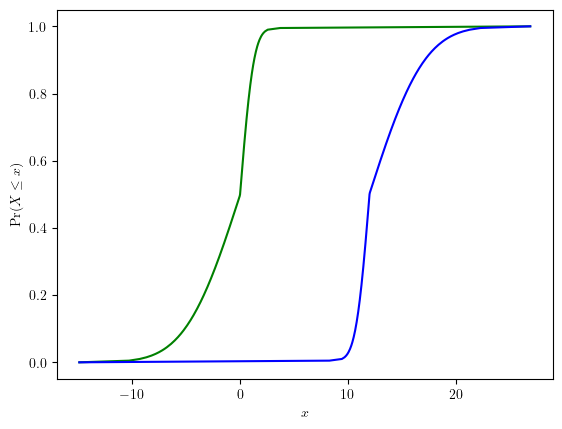

In [8]:
_ = UN(essence='distribution', distribution_parameters=['gaussian', [a_i, b_i]]).display()  # correct

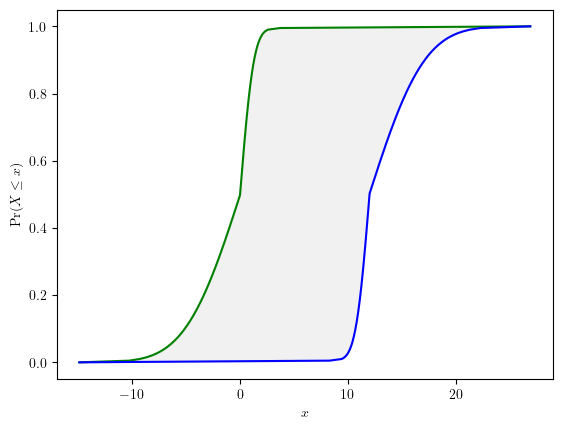

In [10]:
_ = UN(essence='distribution', distribution_parameters=['gaussian', [a_mi, b_mi]]).display(style='band')  # correct

In [ ]:
_ = un.display(style='simple')

In [ ]:
un

In [ ]:
# __repr__ to show not None

In [ ]:
un._math_object

In [ ]:
# the original plotting 
un._math_object.show()

In [ ]:
# # Leslie revised plotting
# failed now
un._math_object.display(style='band')

In [ ]:
# # a deliberate wrong case
# Im thinking to deprecate this explicit pbox initialisation method but only keep distributional instantiation method

# un = UN(name='elas_modulus', 
#             symbol='E', 
#             units='pa', 
#             essence='pbox',
#             pbox_parameters=[1,2])

### if specify a `pbox` with ancilllary information

In [ ]:
un = UN(
    name='Elas_modulus', 
    symbol='E', 
    units='GPa', 
    essence='distribution', 
    distribution_parameters=['gaussian', [(0,1),(1,2)]],
    measurand = "unobservable parameter",
    nature = "expert opinion",
    provenence = "analyst",
    justification = "reference",
)

In [ ]:
un

**an example on how parameter bounds are based**

- depending on what information do people characterise the parameter bounds

In [ ]:
# mannual specification based on existing knowledge 
UN(essence='distribution', 
    distribution_parameters=['gaussian', [(0,1),(1,2)]],
    provenence = "expert opinions",
    justification = "authority")

In [ ]:
UN(essence='distribution', 
    distribution_parameters=['gaussian', [(0.5, 1.5),(1.3, 2.3)]],
    provenence = "estimates from samples",
    justification = "data source")

In [ ]:
# un.JSON_dump(filename='ancillary_UN.json')

In [ ]:
### json serializable

# from hedged specification

In [ ]:
un = UncertainNumber.from_hedge(hedged_language='exactly 7')

In [ ]:
un._math_object

In [ ]:
un

# Confidence box

Confidence boxes tell you the confidence interval (CI) for a parameter ($\theta$) at any confidence level you like. Confidence boxes account for the uncertainty about a parameter that comes from the inference from observations, including the effect of small sample size, but also the effects of imprecision in the data and demographic uncertainty which arises from trying to characterize a continuous parameter from discrete data observations. When confidence boxes have the form of probability boxes, they can be propagated through mathematical expressions using the ordinary machinery of probability bounds analysis, and this allows analysts to compute with confidence, both figuratively and literally, because the results also have this confidence interpretation.


**some questions though**
- why would one want to (or what computation can be done with cbox?)

In [ ]:
from PyUncertainNumber.pba.cbox import *

**cbox for the Binomial distribution**

In [ ]:
# samples of Binomial distribution
d = np.random.binomial(n=12, p=0.6, size=5)
d

In [ ]:
t_cbox = parameter_binomial(x=d, N=12)

In [ ]:
_ = t_cbox.display(title='$C(p)$', style='band')

In [ ]:
t2_cbox = parameter_binomial(x=2, N=10)

# double check the values of the bounds
t2_cbox

In [ ]:
_ = t2_cbox.display(style='band')

In [ ]:
# some tests for the Fig. 3

In [ ]:
t3_cbox = parameter_binomial(x=1, N=3)
_ = t3_cbox.display(style='band')

**nextvalue Binomial**

In [ ]:
_ = nextvalue_binomial(x=d, N=12).display(style='band', title='$F(C(p))$')

In [ ]:
# poisson

In [ ]:
# normal distribution

In [ ]:
d = np.random.normal(loc=25, scale=5, size=6)
d

In [ ]:
sth = parameter_normal_mu(d)

In [ ]:
sth.shape

**cbox: normal data but interval-valued**

# create and serialise multiple UN objects into JSON

In [ ]:
from PyUncertainNumber.multiple_UN import make_many_intervals, Deck

In [ ]:
deck = Deck()

In [ ]:
# # show __repr__ which is long
# deck.JSON_dump(filename="./results/mulUN_data.json")

# pool

In [ ]:
# interval_UN.__dict__
# this thing is the starting point of dumping into JSON;
# I have a few steps in order
# 1. to remove all the None
# modify a few things for the `_math_object`.

In [ ]:
# json_mulUN_data = make_many_intervals()
# type(json_mulUN_data)
# json_mulUN_data[0]
# with open('./results/mulUN_data.json', 'w') as fp:
#     json.dump(json_mulUN_data, fp, cls=UNEncoder, indent=4)

In [ ]:
''' dumping to filesystem '''

# with open('./results/un_object.json', 'w') as fp:
#     json.dump(test_DistlObj_json, fp, indent=4)